"Invistico_Airline.csv", the dataset consists of the details of customers who has already travelled with them. 

We will perform EDA on teh given data set

In [1]:
# import required python libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset

data = pd.read_csv("Invistico_Airline.csv")

In [3]:
data.shape

(129880, 23)

data.shape gives information about the total rows and columns of a dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

This data frame has 129880 records of customers with 23 features(columns).

17 of 23 features are int64, 5 features are object type and 1 feature is float64.

info() gives detailed information of a dataframe at one place.

In [5]:
data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

isna() methods helps in identifying null values in a data frame. It returns True if value of any feature is null.

In this data frame, only "Arrival Delay in Minutes" feature contains null value. We use different techniques to deal with null values.

Some techniques are: fillna(), replace(), interpolate(), etc...

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(129880, 23)

This dataset does not contain any duplicate value.

drop_duplicate() helps in removing duplicate values from a data frame

# EDA of total count of Satisfied vs Unsatisfied responses

In [8]:
data['satisfaction'].isna().sum()

0

check null or missing values in 'satisfaction' column

'satisfaction' feature in dataframe is categorical variable which have 'satisfied ' and 'dissatisfied' values.

In [9]:
data['satisfaction'].value_counts(normalize=True)

satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64

45% of Total customer are not satisfied and almost 55% is satisfied with the given service

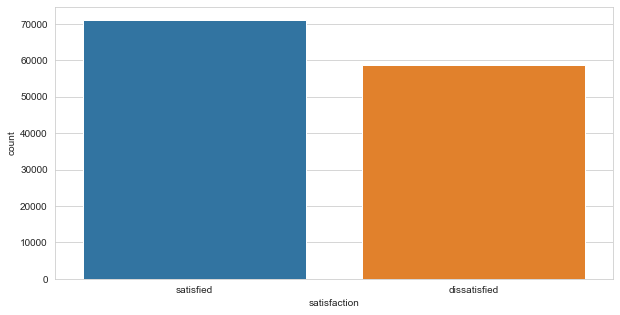

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data.satisfaction)
plt.show()

we can see the fequency distribution of 'satisfaction' feature in graph. 

Count of dissatisfied is lesser than satisfied.

# •	Correlation amongst variables (this include Customer Satisfaction column)

Satisfaction is categorical value. Need to convert in numerical form to get correlation.

Replace 'satisfied' with 1 and 'dissatisfied' with 0

In [11]:
rep_obj = {'satisfaction':{'satisfied':1,'dissatisfied':0}}
data = data.replace(rep_obj)
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [12]:
data.satisfaction.unique()

array([1, 0], dtype=int64)

in array,  we can see the categorical feature has been transformed into 0 an d 1 

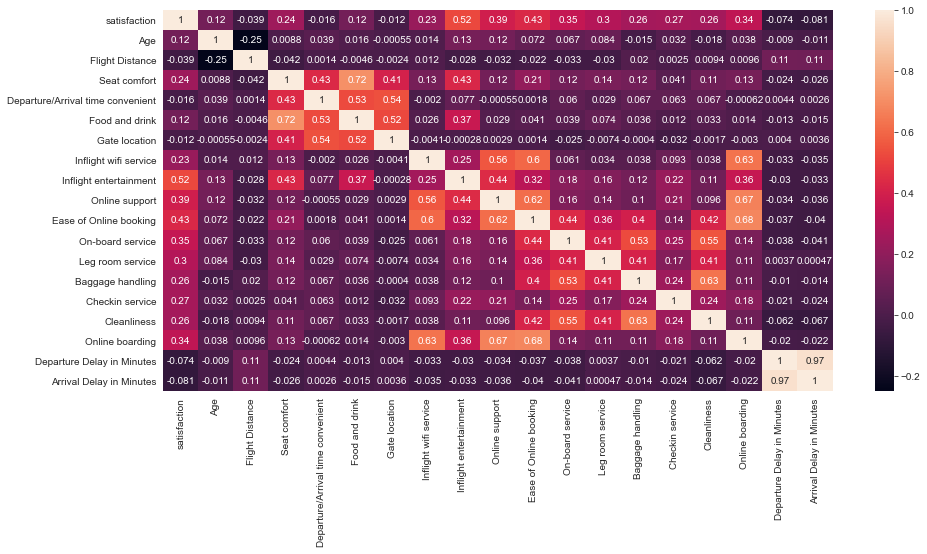

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

from correlation, we can see the customer 'satisfaction' and 'Departure Delay in Minutes'

and 'Arrival delay in Minutes' has strong negative relations

'Inflight Entertainment' showing some sign of positive relations

In [14]:
data['satisfaction'].value_counts()[1]

71087

In [15]:
# sns.displot(data.satisfaction)

# •	EDA of total count of Satisfied vs Unsatisfied responses based on –

For this section we will use crosstab() method of pandas to do 

cross tabulation of two or more factors and frequency of each factors.

In [16]:
data.Gender.value_counts(normalize=True)

Female    0.507384
Male      0.492616
Name: Gender, dtype: float64

male and female represents population equally almost

In [17]:
#Gender
pd.crosstab(data.satisfaction,data.Gender)

Gender,Female,Male
satisfaction,,
0,22971,35822
1,42928,28159


Female is more satisfied compare to Male passengers

In [18]:
#Customer Type

data['Customer Type'].value_counts(normalize=True)

Loyal Customer       0.816908
disloyal Customer    0.183092
Name: Customer Type, dtype: float64

There are almost 82 percent Loyal Customers

In [19]:
pd.crosstab(data.satisfaction,data['Customer Type'])

Customer Type,Loyal Customer,disloyal Customer
satisfaction,,
0,40713,18080
1,65387,5700


Here, we can observe that significant number of 'Loyal Customer' is 'dissatisfied ' with the service. 

<AxesSubplot:xlabel='satisfaction', ylabel='Age'>

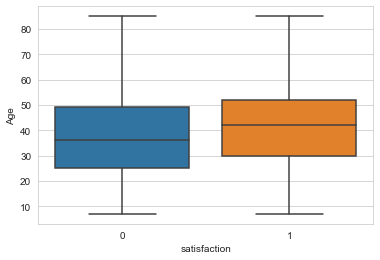

In [20]:
# Age
sns.boxplot(data.satisfaction,data.Age)

The mean age of dissatisfied customer is lower than satisfied. 

It means the young people or these people belongs to working class and 

not happy the kind of service is being provided

In [21]:
#Type of Travel

data['Type of Travel'].value_counts(normalize=True)

Business travel    0.690584
Personal Travel    0.309416
Name: Type of Travel, dtype: float64

69 percent customer belongs to working class and they are travelling for business purpose

In [22]:
pd.crosstab(data.satisfaction,data['Type of Travel'])

Type of Travel,Business travel,Personal Travel
satisfaction,,
0,37337,21456
1,52356,18731


The Customer with personal travel plan looks more dissatisfied if we observe the number.

In [23]:
#Class

data.Class.value_counts(normalize=True)

Business    0.478596
Eco         0.448945
Eco Plus    0.072459
Name: Class, dtype: float64

'Eco Plus' class customer is only 7%

In [24]:
pd.crosstab(data.satisfaction,data.Class)

Class,Business,Eco,Eco Plus
satisfaction,,,
0,18065,35336,5392
1,44095,22973,4019


In [25]:
# Flight Distance

data['Flight Distance'].value_counts(normalize=True)

1963    0.000708
1812    0.000678
1639    0.000670
1981    0.000662
1789    0.000662
          ...   
5474    0.000008
5766    0.000008
5410    0.000008
5806    0.000008
5257    0.000008
Name: Flight Distance, Length: 5398, dtype: float64

<AxesSubplot:xlabel='satisfaction', ylabel='Flight Distance'>

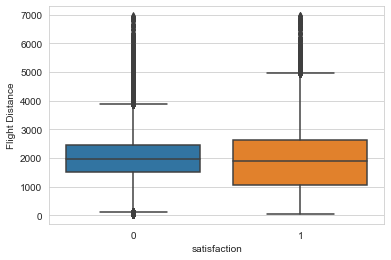

In [26]:
sns.boxplot(data.satisfaction,data['Flight Distance'])

mean 'flight Distance' for those who is dissatisfied is higher than the 'Flight Distance' who are satisfied, Still their are huge 

volume of satisfied customers who are travelling long distances

In [27]:
#Seat Comfort

data['Seat comfort'].value_counts(normalize=True)

3    0.224692
2    0.221173
4    0.218648
1    0.161295
5    0.137257
0    0.036934
Name: Seat comfort, dtype: float64

There are only 3% customer with 'Seat ccomfort' 0

In [28]:
pd.crosstab(data.satisfaction,data['Seat comfort'])

Seat comfort,0,1,2,3,4,5
satisfaction,,,,,,
0,10,11503,18454,18794,9891,141
1,4787,9446,10272,10389,18507,17686


Customer with 'Seat comfort' category 1, 2, 3 are more unsatisfied compare to other category